<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Scotiabank_Market_Analysis_Website_Scraping_(v3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

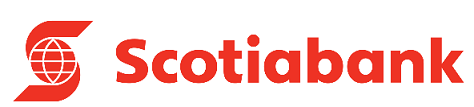**Web Scrape Sentiment Analysis**

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install langdetect
!pip install nltk
!pip install lxml
!pip install unidecode
!pip install textaugment
!pip install joypy
!pip install wordcloud
!pip install better_profanity
!pip install lime
!pip install pyLDAvis==2.1.2
!pip install -U gensim
!apt update
!pip install bs4
!apt install chromium-chromedriver
!pip install selenium
# To load the spacy pre trained model use the following code
!python -m spacy download en_core_web_sm

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
# import libraries
import re
import csv
import json
import time
import sys
import os
import spacy
import joypy
import unidecode
import unicodedata
from io import StringIO 
from bs4 import BeautifulSoup
import requests
import numpy as np
from lxml import etree
from time import sleep
from random import randint
#from selenium import webdriver
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib
%matplotlib inline
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

# NLP Libraries
#nltk.download('brown')
import itertools
import nltk, re, string, collections
from matplotlib import pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
from nltk.corpus import brown
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perception_tagger')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import *

# sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
# LIME
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_tabular import LimeTabularExplainer
#import lime.lime_tabular
# 1. you need to download the chrome driver and extract the folder and point the link for "driver" to that file as done above for driver = 
# 2. driver for chrome can be found here https://chromedriver.chromium.org/downloads
# 3. if your chrome gets updated, please visit this link to update and download your chrome driver for selenium https://sites.google.com/chromium.org/driver/home

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
!pip install selenium
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubun

In [ ]:
# set options to be headless, ..
from selenium.webdriver.common.by import By
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--incognito')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome(options=options)

In [ ]:
content_list = [] # Define empty list to pupulate the data from web scraping

def urlextract(baseUrl,path,href):
    driver.get(baseUrl)
    #Scroll to the end of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)#sleep_between_interactions
    for a in driver.find_elements_by_xpath(path):
        href.append(a.get_attribute('href'))
        content_list.append(a.text)
        
def hyper_link(href_list, path):
    for href in href_list:
        results = driver.get(href)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)#sleep_between_interactions
        page_source = driver.page_source
        web_content = BeautifulSoup(page_source, 'lxml')
        search_content = web_content.text
        content_list.append(search_content)
        #print(len(content_list))

# When using XPath to scrape use the following function
def hyper_link_xpath(href_list, path):
    for href in href_list:
        results = driver.get(href)
        time.sleep(3)#sleep_between_interactions
        page_source = driver.find_elements_by_xpath(path)
        [content_list.append(x.text) for x in page_source]
        #print(len(content_list))

Wallstreet Journal

In [ ]:
# Wallstreet Journal
baseUrl_1 = 'https://www.wsj.com/search?query=bank%20of%20nova%20scotia' # Wall Street Journal
href_1 = []
path_href = './/article/div/div/div/div/div/p'
path_url = './/h3/a'
urlextract(baseUrl_1,path_url,href_1)# Apply function to the url
hyper_link_xpath(href_1,path_href)

Hamilton ETF --- need to work on this script


In [ ]:
# Hamilton ETF
baseUrl_2 = 'https://hamiltonetfs.com/category/in-the-news/' # Hamilton ETF
href_2 = []
path_url = './/article/header/h2/a'
path_href2 = './/article/div/p'
urlextract(baseUrl_2,path_url,href_2)# Apply function to the url
hyper_link_xpath(href_2,path_href2)

Globe and Mail

In [ ]:
# Globe and Mail
url_gm = ['https://www.theglobeandmail.com/search/?q=%22bank%20of%20nova%20scotia%22&mode=all&S=relevant&page=1',
          'https://www.theglobeandmail.com/search/?q=%22bank%20of%20nova%20scotia%22&mode=all&S=relevant&page=2',
         'https://www.theglobeandmail.com/search/?q=%22bank%20of%20nova%20scotia%22&mode=all&S=relevant&page=3']# Globe & Mail
href_gm = []
path_gm = './/article/div/div/p'
[urlextract(baseUrl_gm,path_gm,href_gm) for baseUrl_gm in url_gm]
hyper_link_xpath(href_gm,path_gm)

BNN

In [ ]:
# BNN 
baseUrl = 'https://www.bnnbloomberg.ca/search/bnn-search-7.337157?q=bank+of+nova+scotia#/Articles' #(URL for the website)
bnn = []
path_url = './/article/div/div/a'
path_gm = './/article/div/div/p'
urlextract(baseUrl,path_url,bnn)# Apply function to the url
hyper_link_xpath(bnn,path_gm)

Yahoo Financial

In [ ]:
# YAHOO FINANCIAL
baseUrl = 'https://ca.finance.yahoo.com/quote/BNS.TO/community?p=BNS.TO' #(URL for the website)
driver.get(baseUrl)  # defining url and then passing it to the beautifulsoup
for i in range(0,5):  # Use the range number from 1 to 15 or more to extract as many pages you want to scroll.
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
  time.sleep(2) #sleep_between_interactions based on the delay a page would take to load
  driver.find_element_by_css_selector('[class="Fz(16px) Fw(b) Bdw(2px) Ta(c) Cur(p) Va(m) Bdrs(4px) O(n)! Lh(n) Bgc(#fff) C($c-fuji-blue-1-a) Bdc($c-fuji-blue-1-a) Bd C(#fff):h Bgc($c-fuji-blue-1-a):h Mt(20px) Mb(20px) Px(30px) Py(10px) showNext D(b) Mx(a) Pos(r)"]').click()
  time.sleep(2) #sleep_between_interactions based on the delay a page would take to load
  if i == 5:
    break
page_source = driver.page_source # defining page source of the entire scrolled page for beautifulsoup to work on

# Use Beautifulsoup to scrape the data after the scroll page loop is over 
web_content1 = BeautifulSoup(page_source, 'lxml')
for search_content1 in web_content1.select("div > div.Wow\(bw\) > div"):    # html class name to scrape the info from
    content_list.append(search_content1.text)  # Updating the list
print(len(content_list))

360


Financial Times

In [ ]:
# FINANCIAL TIMES
baseUrl = ['https://www.ft.com/search?q=bank%20of%20nova%20scotia&sort=date',
           'https://www.ft.com/search?q=bank%20of%20nova%20scotia&page=2&sort=date',
           'https://www.ft.com/search?q=bank%20of%20nova%20scotia&page=3&sort=date',
           'https://www.ft.com/search?q=bank%20of%20nova%20scotia&page=4&sort=date']#(URL for the website)
for i in baseUrl:
    results3 = requests.get(i)
    web_content3 = BeautifulSoup(results3.content, 'lxml')
    search_content3 = web_content3.select('div > div > div > div.o-teaser__content')
    [content_list.append(x.text) for x in search_content3]
print(len(content_list))

460


Mootley Fool

In [ ]:
# Mootley Fool
baseUrl_mf = ["https://www.fool.ca/?s=scotiabank", 
           "https://www.fool.ca/page/2/?s=scotiabank",
           "https://www.fool.ca/page/3/?s=scotiabank"]# Mootley Fool   
content_list8 = []
href_mf = []
# Path used to scrape data for the above websites       
path_url = '/html/body/div[2]/div/div/article/ul/li/p[2]'
path_href = '//*[@id="wrapper"]/article/ul[1]/li/h2/a'
path = '//*[@id="full_content"]'
for url in baseUrl_mf:
    driver.get(url)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")    #Scroll to the end of the page
    time.sleep(5)#sleep_between_interactions
    [content_list8.append(cont.text) for cont in driver.find_elements_by_xpath(path_url)]

hyper_link_xpath(href_mf, path)

Seeking Alpha

In [ ]:
# SEEKING ALPHA
baseUrl_sa = ['https://seekingalpha.com/symbol/BNS/news']
            
href_sa = []
path_sa = ".//h3/a"
for url in baseUrl_sa:
    driver.get(url)
    time.sleep(2)
    links = driver.find_elements_by_xpath('.//article/div/div/div/div/h3/a')
    [href_sa.append(x.get_attribute("href")) for x in links]

In [ ]:
hyper_link_xpath(href_sa, path)

Google News

In [ ]:
# GOOGLE NEWS
baseUrl_g = 'https://news.google.com/search?q=scotiabank%20financial&hl=en-CA&gl=CA&ceid=CA%3Aen' #(URL for the website)
path_g = './/article/h3/a'
href_g = []
driver.get(baseUrl_g)#.text
[href_g.append(a.get_attribute('href')) for a in driver.find_elements_by_xpath(path_g)]
[content_list.append(cont.text) for cont in driver.find_elements_by_xpath(path_g)]

In [ ]:
for href in href_g:
  results = driver.get(href)
  time.sleep(2)#sleep_between_interactions
  page_source = driver.find_element_by_tag_name("body")
  content_list.append(page_source.text)

Cleaning Pipeline

In [ ]:
#Cleaning pipeline (RT, Punctuation etc)
!pip install nltk
from bs4 import BeautifulSoup
nltk.download('wordnet')
nltk.download('stopwords')

import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')+['http','rt','https'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Function for cleaning pipeline

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    #Removing RT
    x = re.sub('RT @\\w+: '," ",x)

    # Remove all single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ',x)

    # Remove punctuation
    x = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\\w+:\\S+)"," ",x)
        
    # Lower case
    x = x.lower()

    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [ ]:
# Converting the list of comments into DataFrame
content_clean = pd.DataFrame(content_list).astype('str') 
content_clean.columns=['comments'] # Renaming the column 0 to comments
content_clean['comments'].dropna(inplace=True) # Removing duplicates

In [ ]:
# Test preprocessing pipeline
preprocess('@ RT http t \n co pbxlonxhsj michael retamal scotiabank Economy\nKim')

'co pbxlonxhsj michael retamal scotiabank economy kim'

In [ ]:
# Apply Preprocessing pipeline to Dataframe
content_clean['comments'] = content_clean['comments'].apply(preprocess) # Applying preprocessing pipeline
print(len(content_clean))

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://discord.gg/pvECT44bGU" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


660


In [ ]:
content_clean.head(-10)

,comments
0,soaring price canada draw pledge build housing
1,bank canada gov say tapering right move economy
2,canada record housing sale prompt concern cent...
3,canadian economy surprised sharp growth fourth...
4,dicey economics investing fossil fuel
...,...
645,send release fr scotiabank group head chief fi...
646,send release fr scotiabank applauds government...
647,home follow advertisement business news scotia...
648,send release fr scotiabank recognized one best...


In [ ]:
# Download file to your local computer
import pandas as pd
#from google.colab import files

df = pd.DataFrame(content_clean)
df.to_csv('content_clean.csv')
#files.download('content_clean.csv')

In [ ]:
# Check for duplicates and drop them.
content_clean['comments'].drop_duplicates(inplace = True)

Sentiment Analysis using TextBlob

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
from nltk.sentiment.vader import SentimentIntensityAnalyzer
content_clean[['polarity', 'subjectivity']] = content_clean['comments'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in content_clean['comments'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        content_clean.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        content_clean.loc[index, 'sentiment'] = "positive"
    else:
        content_clean.loc[index, 'sentiment'] = "neutral"
    content_clean.loc[index, 'neg'] = neg
    content_clean.loc[index, 'neu'] = neu
    content_clean.loc[index, 'pos'] = pos
    content_clean.loc[index, 'compound'] = comp

content_clean.head(10)

,comments,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,soaring price canada draw pledge build housing,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
1,bank canada gov say tapering right move economy,0.285714,0.535714,neutral,0.0,1.000,0.000,0.0000
2,canada record housing sale prompt concern cent...,0.000000,0.250000,neutral,0.0,1.000,0.000,0.0000
3,canadian economy surprised sharp growth fourth...,-0.008333,0.550000,positive,0.0,0.526,0.474,0.5423
4,dicey economics investing fossil fuel,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
5,canadian bank led td rbc get boost stimulus,0.000000,0.000000,positive,0.0,0.722,0.278,0.4019
6,pioneer natural resource buy parsley energy bi...,0.100000,0.400000,positive,0.0,0.521,0.479,0.5574
7,spoofing settlement highlight foible trader su...,0.000000,0.000000,positive,0.0,0.714,0.286,0.3400
8,ottawa bank canada governor tiff macklem said ...,0.166667,0.376190,positive,0.0,0.791,0.209,0.7650
9,canada central bank last month slowed pace bon...,0.062500,0.225000,neutral,0.0,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

content_negative = content_clean[content_clean["sentiment"]=="negative"]
content_positive = content_clean[content_clean["sentiment"]=="positive"]
content_neutral = content_clean[content_clean["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(content_clean,"sentiment")

,Total,Percentage
positive,405,61.36
neutral,147,22.27
negative,108,16.36


In [ ]:
# Tokenize the Tweets
def tokenize_tweets(myString):
    tokens = word_tokenize(myString)
    #stemmer = PorterStemmer()
    #result = ([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english')]
    result = [token.lower() for token in tokens if token.lower() not in stop_words]
    return result

tok_content_clean = content_clean['comments'].apply(tokenize_tweets)
print(tok_content_clean)

0      [soaring, price, canada, draw, pledge, build, ...
1      [bank, canada, gov, say, tapering, right, move...
2      [canada, record, housing, sale, prompt, concer...
3      [canadian, economy, surprised, sharp, growth, ...
4            [dicey, economics, investing, fossil, fuel]
                             ...                        
655    [skip, content, search, primary, navigation, m...
656    [send, release, fr, scotiabank, woman, initiat...
657    [send, release, fr, every, future, scotiabank,...
658    [welcome, finextra, use, cooky, help, u, deliv...
659    [send, release, fr, half, canadian, homeowner,...
Name: comments, Length: 660, dtype: object


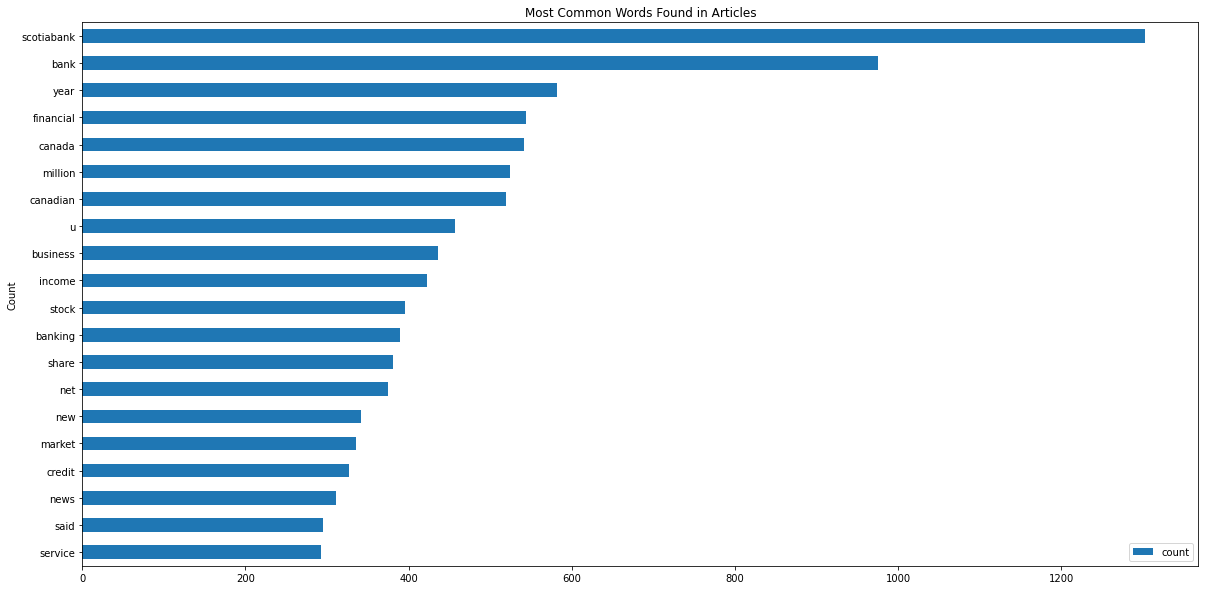

In [ ]:
# Returns most common terms, aside from stop words #

# List of all words across tweets
def most_common(terms_all):
  words_in_tweet = [tweet for tweet in terms_all]
  interesting_terms = list(itertools.chain(*words_in_tweet))
  # Create counter
  counts = collections.Counter(interesting_terms)
  return counts.most_common(20)

# Plot horizontal bar graph

most_comm = pd.DataFrame(most_common(tok_content_clean),columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(20, 10))
most_comm.sort_values(by='count').plot.barh(x='words',y='count',ax=ax)
ax.set_title("Most Common Words Found in Articles")
ax.set(ylabel = 'Count')
plt.show()

### Wordcloud

In [ ]:
#Function to Create Bigram using the tokenized word list above, and convert it to a tupple
tokens = []
def get_bigram(myString):
  for text in myString:
    bigram_finder = BigramCollocationFinder.from_words(text)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 100)
    for bigram_tuple in bigrams:
      x = "%s_%s" % bigram_tuple
      tokens.append(x)

    result = [' '.join([w.lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english') and len(x) > 8]
    return result


In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
  # Creating a custom list of stopwords
  #customStopwords=list(STOPWORDS) + ['country']
  stopwords = set(STOPWORDS)
  wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=stopwords,
                            background_color='white',
                            width=400,
                            height=320
                          ).generate(str(text))

  plt.figure(figsize=(20,8))
  plt.imshow(wordcloudimage)
  plt.axis("off")
  plt.show()

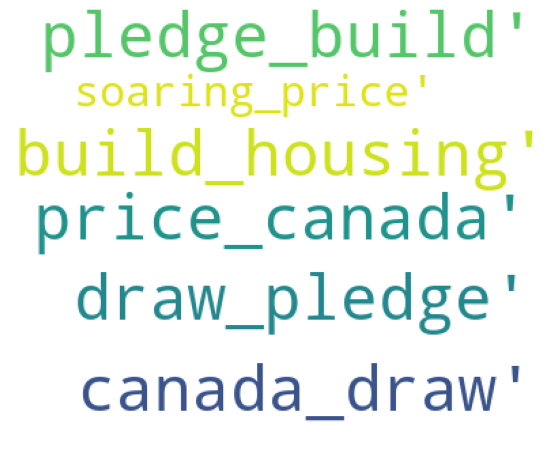

In [ ]:
#create_wordcloud all bi gram
create_wordcloud(get_bigram(tok_content_clean))

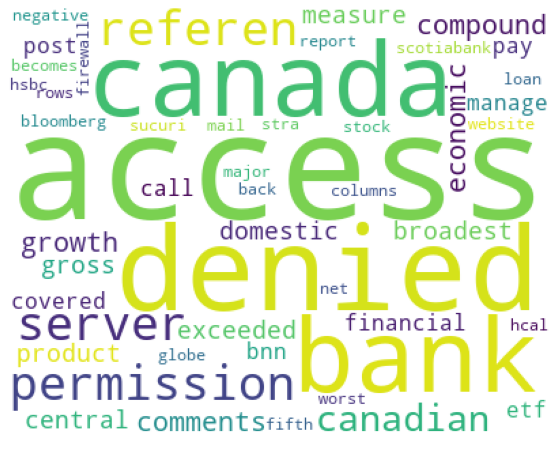

In [ ]:
# Word cloud Negative
create_wordcloud(content_negative)

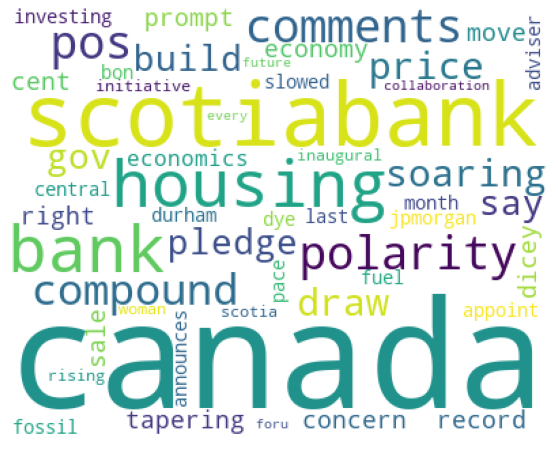

In [ ]:
# Word cloud Neutral
create_wordcloud(content_neutral)

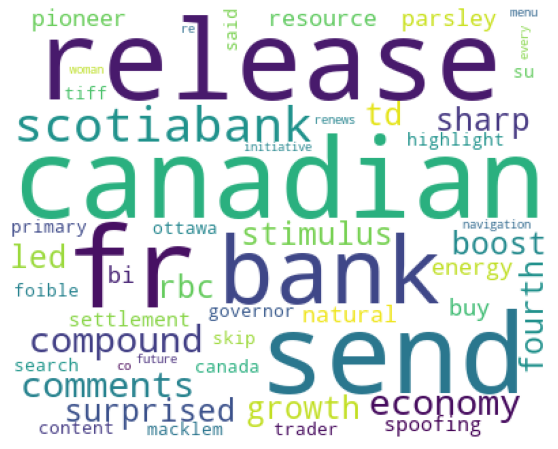

In [ ]:
# Word cloud Positive
create_wordcloud(content_positive)

### Joyplot

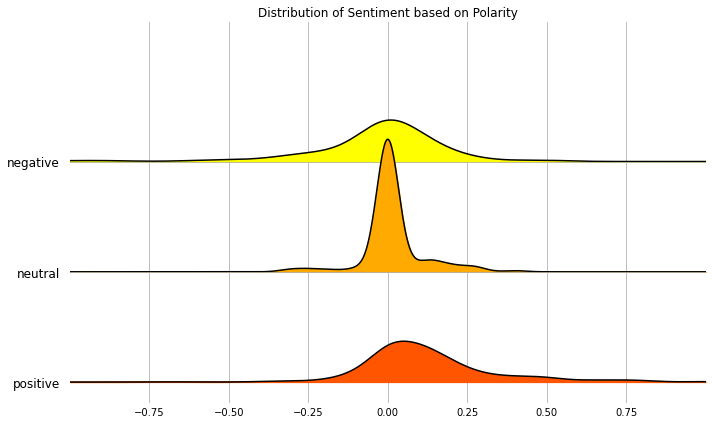

In [ ]:
# Joy Plot
import matplotlib

sm = matplotlib.cm.ScalarMappable(cmap=cm.autumn_r)
%matplotlib inline
#ar = content_clean.value_counts()
fig, axes = joypy.joyplot(content_clean ,grid=True,by=['sentiment'],column=['polarity'],ylabelsize=12,title="Distribution of Sentiment based on Polarity",figsize=(10,6),colormap=cm.autumn_r,x_range=[-1,0,1])

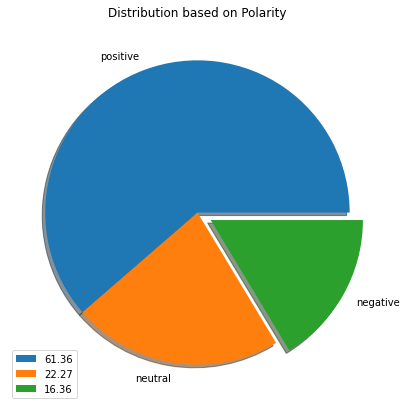

In [ ]:
#Creating PieCart
pichart = count_values_in_column(content_clean,"sentiment")
index = pichart.index
percent = pichart["Percentage"]
explode = (0, 0 ,0.1)  # explode 1st slice
fig = plt.figure(figsize =(10, 7))
plt.title("Distribution based on Polarity")
plt.pie(percent, explode = explode, labels = index, shadow = True)
plt.legend(percent)
plt.show()


Modeling

In [ ]:
tokens = content_clean['comments'].apply(tokenize_tweets)
content_clean['tokens'] = tokens
content_clean['index'] = content_clean.index


In [ ]:
# Make tokens a string again
#Natural Language Processing (NLP)
import warnings
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')

nlp = spacy.load('en_core_web_sm')

content_clean['tokens_back_to_text'] = [' '.join(map(str, l)) for l in content_clean['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

content_clean['lemmas'] = content_clean['tokens_back_to_text'].apply(get_lemmas)

In [ ]:
# Import the file to local machine
from google.colab import files
content_clean.to_csv('content_clean_final.csv')

In [ ]:
# importing gensim libraries
!pip install -U gensim
import gensim
from pyLDAvis import gensim
import pyLDAvis.gensim
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# Create a id2word dictionary
id2word = Dictionary(content_clean['tokens'])
print("id2word = " , len(id2word))
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print("id2word filtering extremes = " , len(id2word))
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in content_clean['tokens']]
print("corpus length = " , len(corpus))

id2word =  8056
id2word filtering extremes =  4547
corpus length =  660


In [ ]:
# Instantiating a Base LDA model 
warnings.filterwarnings('ignore', 'calling np.sum(generator) is deprecated')
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)

In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

In [ ]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [ ]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
u ago stock bank minute canadian new state said one

------ Topic 1 ------
bank scotiabank financial canadian year news share u million said

------ Topic 2 ------
bank scotiabank year u financial per share article scotia said

------ Topic 3 ------
scotiabank canada bank cision financial stock customer canadian banking help

------ Topic 4 ------
income million net bank interest q year provision loss non



In [ ]:
# Compute Perplexity
warnings.filterwarnings("ignore", message= "calling np.sum(generator) is deprecated")
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=content_clean['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -7.288639545181803

Coherence Score:  0.41599353132259875


In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.043079  0.112092       1        1  37.150364
4     -0.100637 -0.105968       2        1  25.403470
2      0.011523 -0.005223       3        1  17.670027
0      0.141370 -0.038417       4        1  10.860687
1     -0.009177  0.037516       5        1   8.915452, topic_info=            Term         Freq        Total Category  logprob  loglift
1170      income   395.000000   395.000000  Default  30.0000  30.0000
2067  scotiabank  1269.000000  1269.000000  Default  29.0000  29.0000
891          net   351.000000   351.000000  Default  28.0000  28.0000
7           bank   914.000000   914.000000  Default  27.0000  27.0000
538      million   488.000000   488.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
74         group    22.125868   196.627438   Topic5  -5.8204   0.2328
300         also    22.260587   220.980878   Topic5  -5.8144   0.1221
1197   community    21.906751   223.517935   Topic5  -5.8304   0.0947
89        market    21.565859   320.638921   Topic5  -5.8461  -0.2818
436      banking    21.656697   376.111055   Topic5  -5.8419  -0.4372

[400 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2958      4  0.906268          abbas
2514      1  0.838368  accessibility
2514      2  0.062101  accessibility
2514      3  0.020700  accessibility
2514      4  0.010350  accessibility
...     ...       ...            ...
67        4  0.063966           year
67        5  0.122449           year
4545      5  0.723119        younger
3270      5  0.727100              z
2704      1  0.935105        zeifman

[1080 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2])

## Modeling

In [ ]:
# Split the data into Train, Test and Validate
X = content_clean['comments']
y = content_clean['sentiment']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.01, random_state=42)
print(X_train.count(), X_test.count(), X_val.count())

462 196 2


In [ ]:
ngrams = (1,1)
tfidf = TfidfVectorizer(ngram_range=ngrams, stop_words='english', analyzer='word', use_idf=True, norm='l2') #TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. 
X_train_text = tfidf.fit_transform(X_train)
X_test_text = tfidf.transform(X_test)

In [ ]:
#on TF-IDF data
MNB = MultinomialNB()
MNB.fit(X_train_text, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(X_test_text), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

BNB = BernoulliNB()
BNB.fit(X_train_text, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test_text), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

CNB = ComplementNB()
CNB.fit(X_train_text, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(X_test_text), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

GNB = GaussianNB()
GNB.fit(X_train_text.todense(), y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB.predict(X_test_text.todense()), y_test)
print('accuracy_score_gnb = '+str('{:4.2f}'.format(accuracy_score_gnb*100))+'%')

LSVC = LinearSVC(random_state=0, tol=1e-5)
LSVC.fit(X_train_text, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(X_test_text), y_test)
print('accuracy_score_lsvc = '+str('{:4.2f}'.format(accuracy_score_lsvc*100))+'%')

SGDC = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=30, shuffle=True, verbose=0, n_jobs=None)
SGDC.fit(X_train_text, y_train)
accuracy_score_sgdc = metrics.accuracy_score(SGDC.predict(X_test_text), y_test)
print('accuracy_score_sgdc = '+str('{:4.2f}'.format(accuracy_score_sgdc*100))+'%')

accuracy_score_mnb = 62.76%
accuracy_score_bnb = 38.78%
accuracy_score_cnb = 65.31%
accuracy_score_gnb = 64.80%
accuracy_score_lsvc = 69.90%
accuracy_score_sgdc = 67.35%


Improving SGD Classifier Model

In [ ]:
# Creating Pipeline
# Using CountVectorizer and TFIDF then combining them in SGD Classifier
pipeline = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',SGDClassifier()),])

parameters={'vect__max_df':(0.5,0.25,0.75,1.0),'vect__ngram_range':((1,1),(1,2)),'tfidf__use_idf':(True,False),
            'tfidf__norm':('l1','l2'),'clf__max_iter':(22,),'clf__alpha':(0.00001,0.000001),'clf__penalty':('l2','elasticnet'),
            'clf__max_iter':(10,20,30,50,70),}

In [ ]:
if __name__== "__main__":
  grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
  print("pipeline:",[name for name,_ in pipeline.steps])
  print("parameters:")
  print(parameters)
  t0 = time.clock()
  grid_search.fit(X_train,y_train)
  print()
  print("Best score:%0.3f" % grid_search.best_score_)
  print("Best parameters:")
  best_parameters = grid_search.best_estimator_.get_params()
  for  param_name in sorted ( parameters.keys()):
    print("\t%s:%r"%(param_name,best_parameters[param_name]))

pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__max_df': (0.5, 0.25, 0.75, 1.0), 'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__max_iter': (10, 20, 30, 50, 70), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 5 folds for each of 640 candidates, totalling 3200 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  4.7min



Best score:0.764
Best parameters:
	clf__alpha:1e-06
	clf__max_iter:70
	clf__penalty:'l2'
	tfidf__norm:'l2'
	tfidf__use_idf:True
	vect__max_df:1.0
	vect__ngram_range:(1, 1)


[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  6.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:818: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [ ]:
# Creating Model using pipeline using best parameters
model = Pipeline([('vect',CountVectorizer(max_df=0.25,ngram_range=(1,1))),
                          ('tfidf',TfidfTransformer(norm='l2',use_idf=True)),
                          ('clf',SGDClassifier(alpha=1e-05,loss='log',penalty='l2',max_iter=30))])
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.25,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=No...
                ('clf',
                 SGDClassifier(alpha=1e-05, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log', max_iter=30,
           

In [ ]:
y_val_pred = model.predict(X_test)
print(confusion_matrix(y_true=y_test,y_pred=y_val_pred))
class_names=[str(x)for x in model.classes_]
print(classification_report(y_true=y_test,y_pred=y_val_pred,target_names=class_names))

[[  9   4  16]
 [  2  24  19]
 [  3  15 104]]
              precision    recall  f1-score   support

    negative       0.64      0.31      0.42        29
     neutral       0.56      0.53      0.55        45
    positive       0.75      0.85      0.80       122

    accuracy                           0.70       196
   macro avg       0.65      0.57      0.59       196
weighted avg       0.69      0.70      0.68       196



Explaining predictions using lime

In [ ]:
# Taking a sample of the data to verify in LIME and predicting its probability
def use_lime(text):
  print(text) 
  print(class_names)
  print(model.predict_proba([text]).round(2))
  print(model.predict([text]))
  
  # Using LIME
  explainer = LimeTextExplainer(class_names=class_names)
  exp = explainer.explain_instance(text, model.predict_proba, num_features=153, labels=[0,1,2])
  exp.show_in_notebook(text=text)

In [ ]:
data_pred = X_val.iloc[1]
use_lime('As the Chief Investment Advisor of The Motley Fool Canada, every day I wake up and get the chance to live my lifelong dream — helping everyday investors as you identify and hopefully profit from some of the world’s most promising investment opportunities.It’s been a heck of a run since we started here almost a decade ago — but what I’m most proud of is our ability to consistently be on the cutting edge of new investing trends…like first picking Shopify in March 2016 at $34.59 a share (now trading at around $1,400)The Trade Desk in August 2017 at $49.99 a share… (now trading at around $588)or MercadoLibre in January 2014 at $97.84 a share…(now trading around $1,358)Those are actual investment recommendations my team and I have shared with The Motley Fool Canada community over the years – and the list goes on!While you can’t go back in time and invest in Shopify, The Trade Desk, or MercadoLibre when they were first recommended as a “buy,” I believe we’re offering you the next best thing')

As the Chief Investment Advisor of The Motley Fool Canada, every day I wake up and get the chance to live my lifelong dream — helping everyday investors as you identify and hopefully profit from some of the world’s most promising investment opportunities.It’s been a heck of a run since we started here almost a decade ago — but what I’m most proud of is our ability to consistently be on the cutting edge of new investing trends…like first picking Shopify in March 2016 at $34.59 a share (now trading at around $1,400)The Trade Desk in August 2017 at $49.99 a share… (now trading at around $588)or MercadoLibre in January 2014 at $97.84 a share…(now trading around $1,358)Those are actual investment recommendations my team and I have shared with The Motley Fool Canada community over the years – and the list goes on!While you can’t go back in time and invest in Shopify, The Trade Desk, or MercadoLibre when they were first recommended as a “buy,” I believe we’re offering you the next best thing


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


References:

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

https://towardsdatascience.com/detecting-hate-tweets-twitter-sentiment-analysis-780d8a82d4f6

https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb https://towardsdatascience.com/twitter-topic-modeling-e0e3315b12e2